# Customer Segmentation Analysis

### Libraries imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Explore the dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Observation:
- As there are no null values, no need to clean the dataset.

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data exploration and visualization

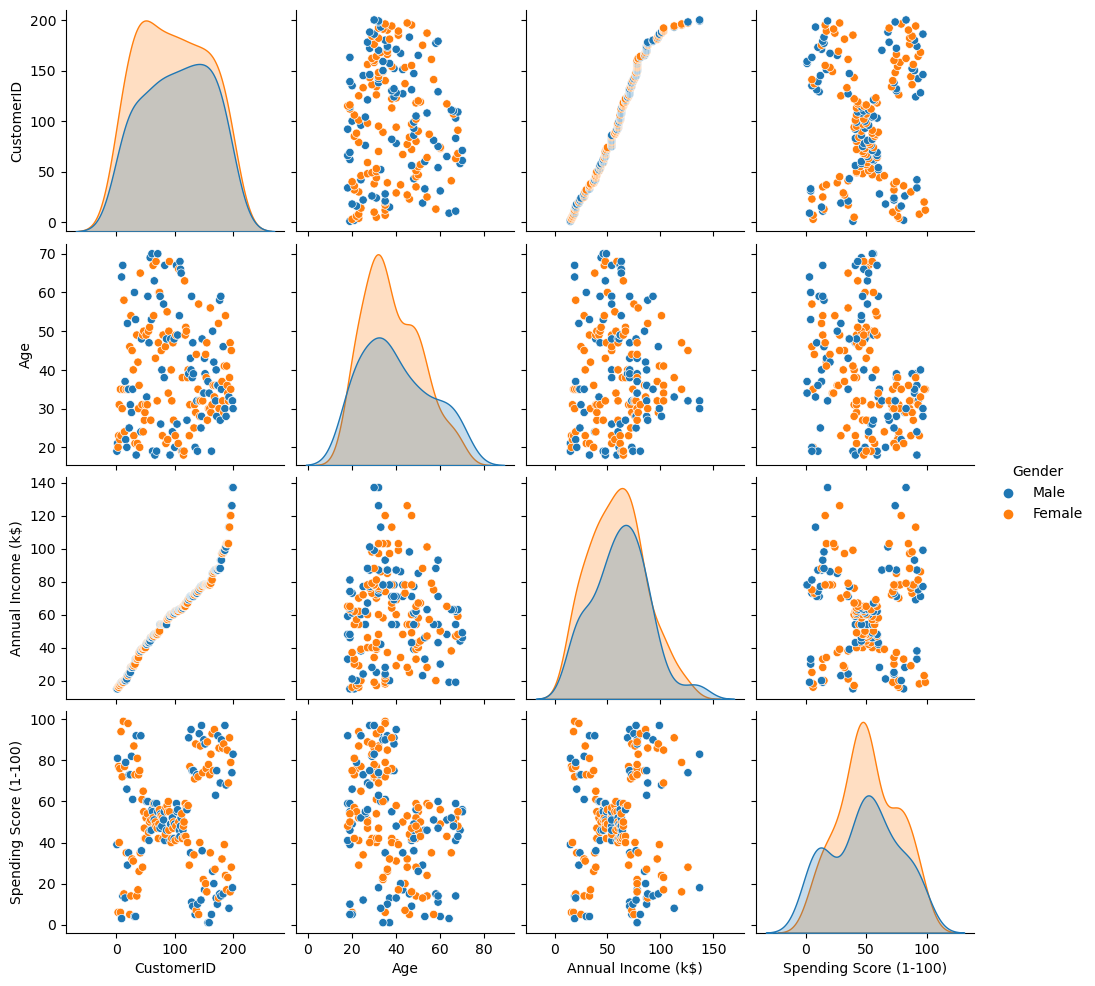

In [8]:
#Plot pairwise relationships between features in a dataset.
#plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

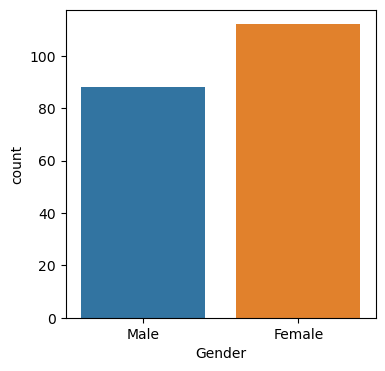

In [9]:
#Number of male vs female
plt.figure(1, figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

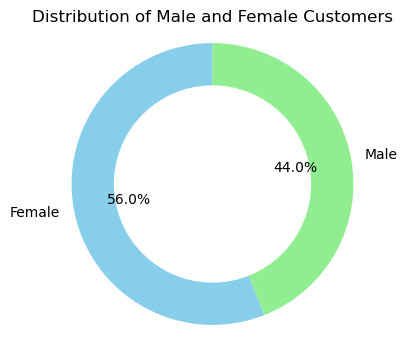

In [10]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Male and Female Customers')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.show()

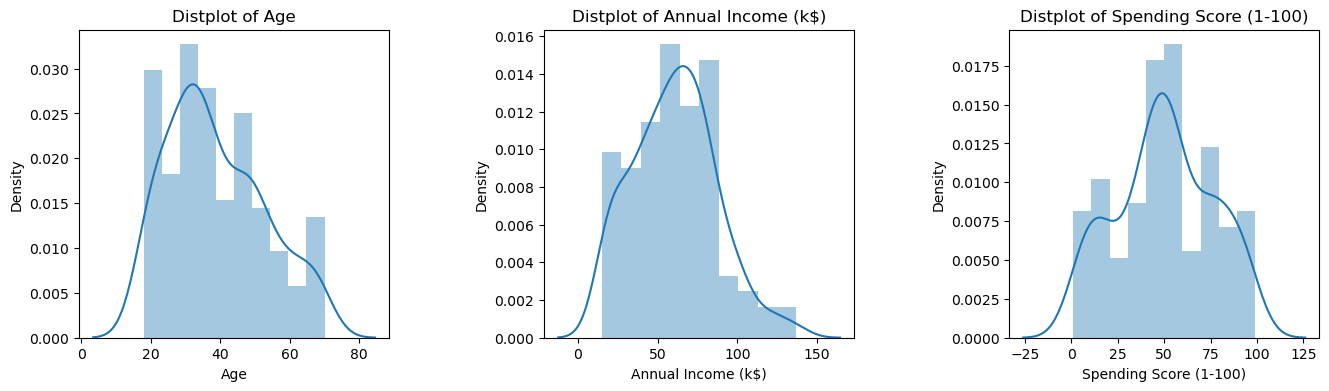

In [11]:
#Distribution of numerical features (Age, Annual income & Spending score)

plt.figure(1, figsize=(16,4))
n = 0 
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=10)
    plt.title('Distplot of {}'.format(x))
plt.show()

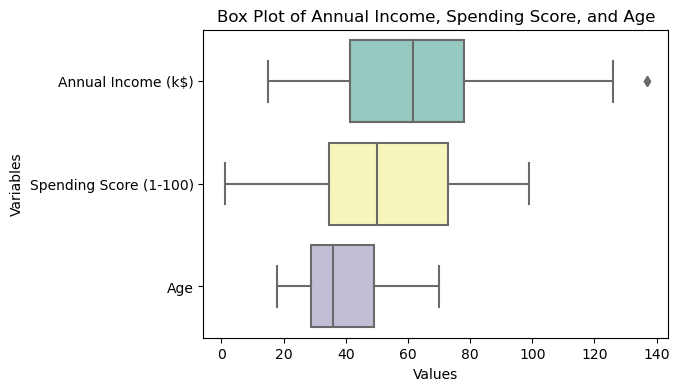

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], orient='h', palette='Set3')

plt.title('Box Plot of Annual Income, Spending Score, and Age')
plt.xlabel('Values')
plt.ylabel('Variables')

plt.show()

### "Age" VS "Spending Score"

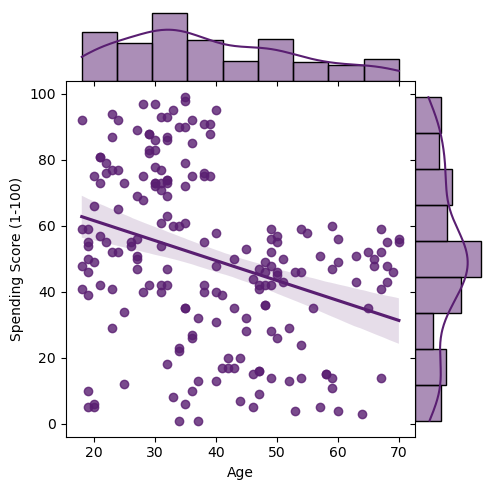

In [13]:
palette = sns.color_palette("dark", as_cmap=True)
sns.jointplot(x="Age", y="Spending Score (1-100)",data=df, kind='reg',height=5, color=palette[4],space=0)

### "Age" VS "Annual Income"

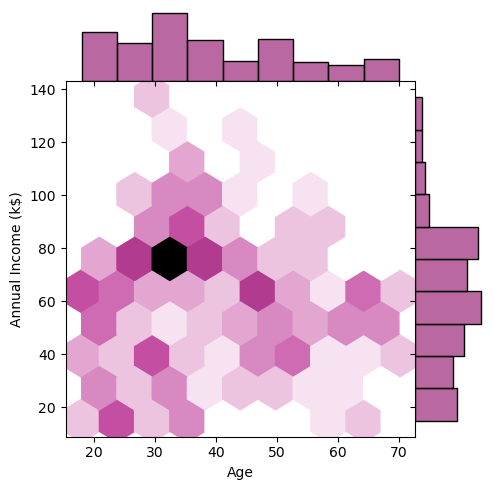

In [14]:
sns.jointplot(x=df["Age"], y=df["Annual Income (k$)"], kind='hex', color=palette[6],height=5,ratio=5,space=0)

### "Spending Score" VS "Annual Income"

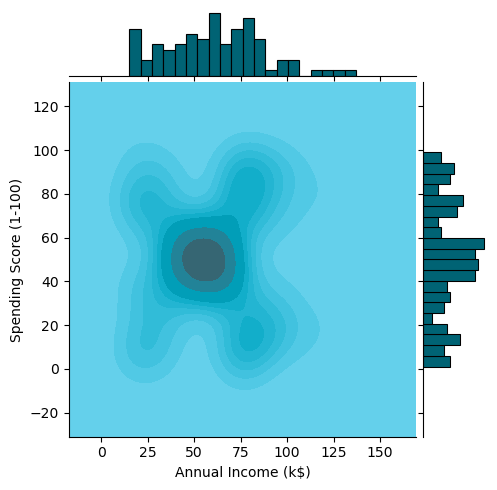

In [15]:
g = sns.JointGrid(data = df, height = 5, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = palette[9])
g.plot_marginals(sns.histplot, color = palette[9], alpha = 1, bins = 20);

### Heatmapt : visualizing the correlation between feaures

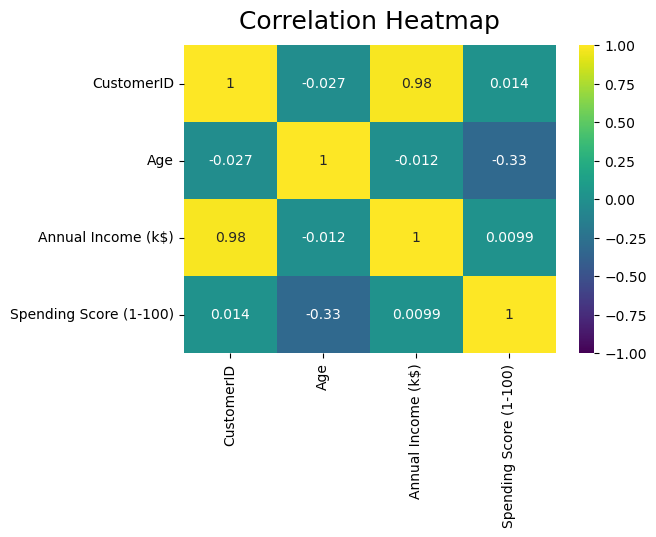

In [16]:
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### K-means:-

- Simplest and popular unsupervised machine learning algorithms.
- A cluster refers to a collection of data points aggregated together because of certain similarities.
- You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.
- Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.
- In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

### Working of K-Means:
- The K-means algorithm in data mining starts with a first group of randomly selected centroids.
- These are used as the beginning points for every cluster.
- Then performs iterative calculations to optimize the positions of the centroids.
- It halts creating and optimizing clusters when either:
    - The centroids have stabilized: there is no change in their values because the clustering has been successful. 
    - The defined number of iterations has been achieved.

### Finding Optimal K-value using Elbow method:

- Here we plot the mean distance of every point toward its cluster center, as a function of the number of clusters.
- Sometimes the plot has an arm shape, and the elbow would be the optimal K.
    - wcss stands for: within cluster sum of square
    - wcss: distance between each point and centroid in a cluster
    - when we plot wcss with K-value plot looks like a elbow
    - the no.of cluster increases, wcss value decreases
    - wcss value is largest when k=1
- here we are creating a loop to find optimal value of 'K' using elbow method

### Creating a separate dataframe, here we are extracting last two for customer segmentation

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [18]:
#Perform clustering (optimizing K with the elbow method). 
#In order to simplify the problem, we start by keeping only the two last columns as features.
X = df.iloc[:, -2:]

In [19]:
#this iterates k-means for our data
#here we are using initializer k-means++, which ensures smarter initialization of centroids and improves cluster quality
#kmeans.inertia_: seggregates data points into cluster

km_inertias, wcss = [], []

for k in range(2, 11):
    km = KMeans(n_clusters=k).fit(X)
    km_inertias.append(km.inertia_)
    wcss.append(silhouette_score(X, km.labels_))

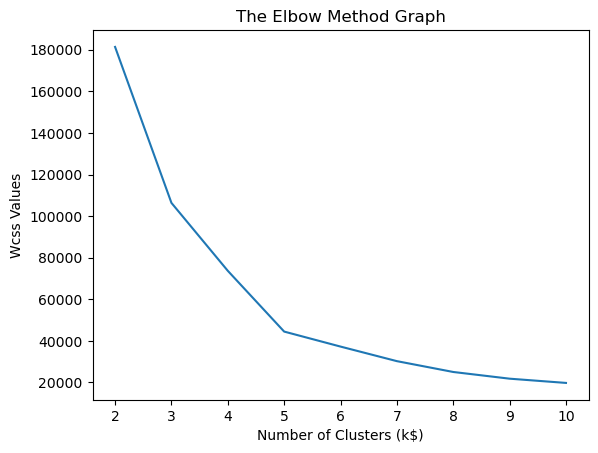

In [20]:
sns.lineplot(x=range(2, 11), y=km_inertias)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of Clusters (k$)')
plt.ylabel('Wcss Values')
plt.show()

### Observation:
- Plot reduces drastically from culter number 1 to 3.
- Slows down till 5.
- Flatens from 6 to 10.
- We are getting elbow where k=5.
- So, the optimal number of cluster will be 5.

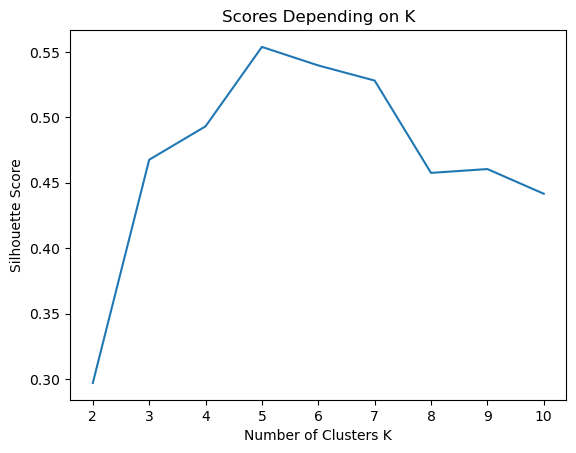

In [21]:
sns.lineplot(x=range(2, 11), y=wcss)
plt.title('Scores Depending on K')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
for k, wcss in zip(range(2, 11), wcss):
    print(f"Silhouette Score for K={k}: {wcss}")

Silhouette Score for K=2: 0.2968969162503008
Silhouette Score for K=3: 0.46761358158775435
Silhouette Score for K=4: 0.4931963109249047
Silhouette Score for K=5: 0.553931997444648
Silhouette Score for K=6: 0.53976103063432
Silhouette Score for K=7: 0.5281944387251989
Silhouette Score for K=8: 0.4575689106804838
Silhouette Score for K=9: 0.4605043439759829
Silhouette Score for K=10: 0.4416208208785718


### Observation:
- Max Silhouette Score for K=5 is 0.553931997444648

## Training a model using K-Means Algorithm

In [34]:
km = KMeans(n_clusters=5).fit(X)

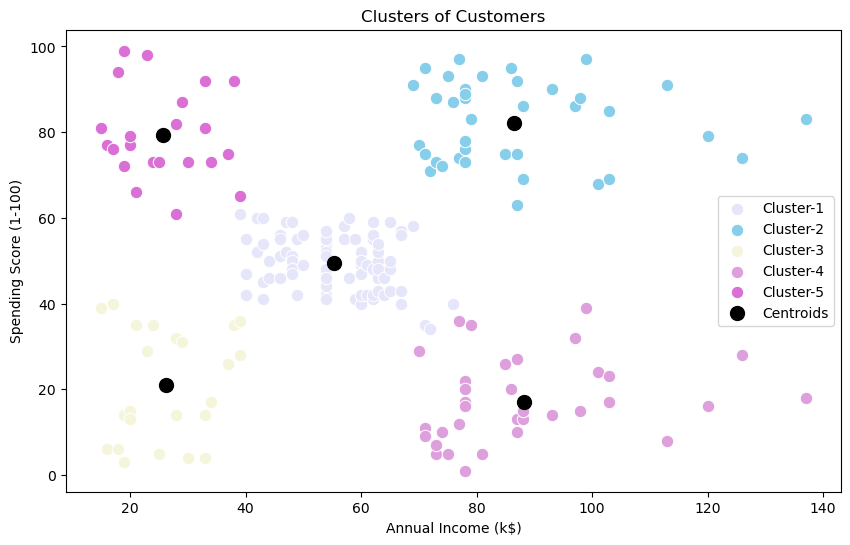

In [40]:
# K-Means visualization on pair of 2 features
#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=X, x=X.columns[0], y=X.columns[1], hue=km.labels_)
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.title('K-Means Clustering Visualization')
#plt.legend()
#plt.show()

plt.figure(figsize=(10, 6))

sns.scatterplot(data=X.loc[km.labels_ == 0], x=X.columns[0], y=X.columns[1], s=80, color="lavender", label='Cluster-1')
sns.scatterplot(data=X.loc[km.labels_ == 1], x=X.columns[0], y=X.columns[1], s=80, color="skyblue", label='Cluster-2')
sns.scatterplot(data=X.loc[km.labels_ == 2], x=X.columns[0], y=X.columns[1], s=80, color="beige", label='Cluster-3')
sns.scatterplot(data=X.loc[km.labels_ == 3], x=X.columns[0], y=X.columns[1], s=80, color="plum", label='Cluster-4')
sns.scatterplot(data=X.loc[km.labels_ == 4], x=X.columns[0], y=X.columns[1], s=80, color="orchid", label='Cluster-5')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='black', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Definition of customers profiles corresponding to each clusters

In [36]:
# Profiles of customers
X['label'] = km.labels_

In [37]:
# Count of customers in each cluster
X.label.value_counts()

0    81
1    39
3    35
2    23
4    22
Name: label, dtype: int64

In [38]:
# Cluster profiles
for k in range(5):
    print(f'Cluster Number : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

Cluster Number : 0
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
min             39.000000               34.000000
max             76.000000               61.000000



Cluster Number : 1
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
min             69.000000               63.000000
max            137.000000               97.000000



Cluster Number : 2
       Annual Income (k$)  Spending Score (1-100)
count           23.000000               23.000000
mean            26.304348               20.913043
min             15.000000                3.000000
max             39.000000               40.000000



Cluster Number : 3
       Annual Income (k$)  Spending Score (1-100)
count                35.0               35.000000
mean                 88.2               17.114286
min            

In [39]:
# Specific cluster profile (for cluster 1)
X[X.label == 1].describe().iloc[[0, 1, 3, 7], :-1]

,Annual Income (k$),Spending Score (1-100)
count,39.000000,39.000000
mean,86.538462,82.128205
min,69.000000,63.000000
max,137.000000,97.000000


### The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:

- <span style='background-color: #FFDB58;' >Cluster 0:</span> 
    - Customers in this cluster demonstrate a moderate annual income and a relatively high spending score.
- <span style='background-color: #FFDB58;' >Cluster 1:</span>
    - This group comprises customers with a relatively high annual income but a low spending score.
- <span style='background-color: #FFDB58;' >Cluster 2:</span>
    - Customers in this category exhibit a low annual income and a moderate spending score.
- <span style='background-color: #FFDB58;' >Cluster 3:</span>
    - This cluster consists of customers with a low annual income but a high spending score.    
- <span style='background-color: #FFDB58;' >Cluster 4:</span>
    - Customers in this segment display a moderate annual income and a moderate spending score.

- Understanding these customer segments enables strategic decision-making. For example, identifying customers with high annual incomes but low spending scores suggests an opportunity for targeted marketing strategies to increase their spending habits and overall engagement. Additionally, maintaining customer satisfaction, especially among loyal customers, is essential for long-term success.



- This analysis showcases the capability of clustering algorithms to generate insightful recommendations. While this dataset only considers two variables (income and spending), incorporating additional variables can provide more precise and business-specific insights, further enhancing decision-making processes.
